# Задача регрессии

В данном ноутбуке представлена решение задачи регресси

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew
from sklearn import metrics

Данные взяты из сайта kaggle. 
Ссылка на датасет: 'https://www.kaggle.com/parv619/hackerearths-reduce-marketing-waste'


In [3]:
train_df = pd.read_csv('/Users/gm/Desktop/new/train_3.csv')

In [4]:
train_df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [5]:
train_df.shape

(7007, 23)

In [6]:
train_df.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [7]:
train_df.isnull().mean()

Deal_title               0.000000
Lead_name                0.000000
Industry                 0.000143
Deal_value               0.007278
Weighted_amount          0.074925
Date_of_creation         0.000000
Pitch                    0.000000
Contact_no               0.000000
Lead_revenue             0.000000
Fund_category            0.000000
Geography                0.138718
Location                 0.001570
POC_name                 0.001142
Designation              0.000000
Lead_POC_email           0.000000
Hiring_candidate_role    0.000000
Lead_source              0.000000
Level_of_meeting         0.000000
Last_lead_update         0.090338
Internal_POC             0.000000
Resource                 0.021264
Internal_rating          0.000000
Success_probability      0.000000
dtype: float64

In [8]:
train_df.nunique()

Deal_title               7007
Lead_name                7007
Industry                  171
Deal_value               6907
Weighted_amount          6480
Date_of_creation          777
Pitch                       2
Contact_no               7007
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 5261
Designation                10
Lead_POC_email           7007
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             5
Success_probability       248
dtype: int64

In [9]:
train_df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


Предобработка данных.

Заполнение недостающие данные средними и модальными значениями.

In [10]:
train_df['Weighted_amount'] = train_df['Weighted_amount'].str.replace('$','').astype(float)

/var/folders/v2/kf8cnkyx59n18dm44vzqy_gh0000gn/T/ipykernel_85837/749819487.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['Weighted_amount'] = train_df['Weighted_amount'].str.replace('$','').astype(float)


In [11]:
train_df['Deal_value'] = train_df['Deal_value'].str.replace('$','').astype(float)

/var/folders/v2/kf8cnkyx59n18dm44vzqy_gh0000gn/T/ipykernel_85837/2652349512.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['Deal_value'] = train_df['Deal_value'].str.replace('$','').astype(float)


In [12]:
train_df[['place','state']]=train_df['Location'].str.split(' ',1, expand=True)

In [13]:
train_df['Deal_value']=train_df['Deal_value'].fillna((train_df['Deal_value'].mean()))
train_df['Weighted_amount']=train_df['Weighted_amount'].fillna((train_df['Weighted_amount'].mean()))
train_df['Industry']=train_df['Industry'].fillna((train_df['Industry'].mode()[0]))
train_df['Last_lead_update']=train_df['Last_lead_update'].fillna((train_df['Last_lead_update'].mode()[0]))
train_df['Resource']=train_df['Resource'].fillna((train_df['Resource'].mode()[0]))

In [14]:
train_df['state'].fillna('0',inplace=True)
train_df['Geography'].fillna('USA',inplace=True)
train_df.loc[train_df['state']=='0', 'Geography'] = 'India'
train_df.drop(columns=['place','state'], inplace=True)

In [15]:
train_df.isnull().sum()

Deal_title                0
Lead_name                 0
Industry                  0
Deal_value                0
Weighted_amount           0
Date_of_creation          0
Pitch                     0
Contact_no                0
Lead_revenue              0
Fund_category             0
Geography                 0
Location                 11
POC_name                  8
Designation               0
Lead_POC_email            0
Hiring_candidate_role     0
Lead_source               0
Level_of_meeting          0
Last_lead_update          0
Internal_POC              0
Resource                  0
Internal_rating           0
Success_probability       0
dtype: int64

In [16]:
train_df['Year'] = train_df.Date_of_creation.apply(lambda x: x.split('-')[-3]).astype('object')

In [17]:
train_df = train_df.drop(columns=['Lead_name', 'Industry', 'Contact_no','Location','Lead_POC_email','POC_name','Hiring_candidate_role','Last_lead_update', 'Internal_POC', 'Designation','Date_of_creation'], axis = 1)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Deal_title           7007 non-null   object 
 1   Deal_value           7007 non-null   float64
 2   Weighted_amount      7007 non-null   float64
 3   Pitch                7007 non-null   object 
 4   Lead_revenue         7007 non-null   object 
 5   Fund_category        7007 non-null   object 
 6   Geography            7007 non-null   object 
 7   Lead_source          7007 non-null   object 
 8   Level_of_meeting     7007 non-null   object 
 9   Resource             7007 non-null   object 
 10  Internal_rating      7007 non-null   int64  
 11  Success_probability  7007 non-null   float64
 12  Year                 7007 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 711.8+ KB


In [19]:
train_df

,Deal_title,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability,Year
0,TitleM5DZY,320506.0,2.067264e+06,Product_2,50 - 100 Million,Category 2,USA,Website,Level 3,No,3,73.60,2020
1,TitleKIW18,39488.0,2.408768e+05,Product_2,500 Million - 1 Billion,Category 4,India,Others,Level 1,No,5,58.90,2019
2,TitleFXSDN,359392.0,2.407926e+06,Product_1,500 Million - 1 Billion,Category 4,USA,Marketing Event,Level 1,No,4,68.80,2019
3,TitlePSK4Y,76774.0,4.683214e+05,Product_2,500 Million - 1 Billion,Category 3,USA,Contact Email,Level 2,We have all the requirements,1,64.50,2021
4,Title904GV,483896.0,1.569884e+06,Product_2,50 - 100 Million,Category 3,India,Website,Level 2,No,4,62.40,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,TitleJ7TDY,192800.0,1.195360e+06,Product_1,100 - 500 Million,Category 4,India,Contact Email,Level 1,We have all the requirements,4,107.34,2020
7003,TitleO1IIN,220208.0,1.453373e+06,Product_2,100 - 500 Million,Category 1,India,Marketing Event,Level 2,We have all the requirements,3,26.35,2020
7004,TitleF1FWY,253608.0,1.569884e+06,Product_1,100 - 500 Million,Category 2,USA,Marketing Event,Level 3,No,1,70.60,2020
7005,TitleXVBNJ,118615.0,7.947205e+05,Product_1,500 Million - 1 Billion,Category 2,USA,Website,Level 3,We have all the requirements,3,-5.00,2019


<AxesSubplot:ylabel='Weighted_amount'>

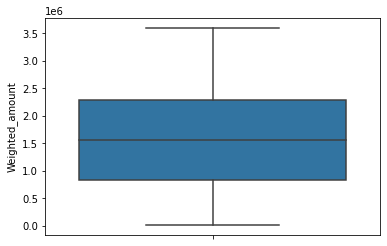

In [20]:
sns.boxplot(y = train_df['Weighted_amount'])

<AxesSubplot:ylabel='Deal_value'>

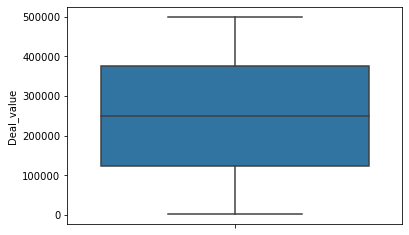

In [21]:
sns.boxplot(y = train_df['Deal_value'])

<AxesSubplot:ylabel='Success_probability'>

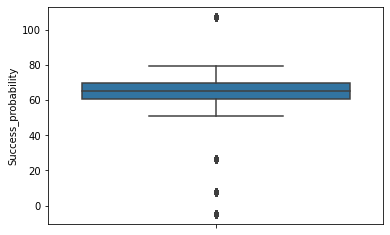

In [22]:
sns.boxplot(y = train_df['Success_probability'])

In [23]:
round(train_df[['Deal_title','Deal_value','Weighted_amount','Success_probability']].describe().T)

,count,mean,std,min,25%,50%,75%,max
Deal_value,7007.0,249656.0,144231.0,1551.0,123294.0,248796.0,375706.0,500000.0
Weighted_amount,7007.0,1569884.0,886377.0,8708.0,826428.0,1569884.0,2293031.0,3601416.0
Success_probability,7007.0,65.0,18.0,-5.0,61.0,65.0,70.0,107.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 64.75 and sigma = 17.93



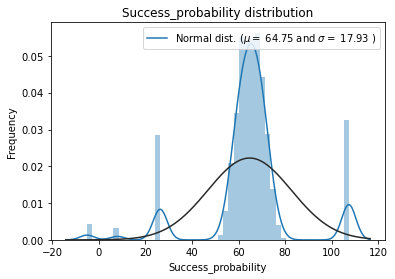

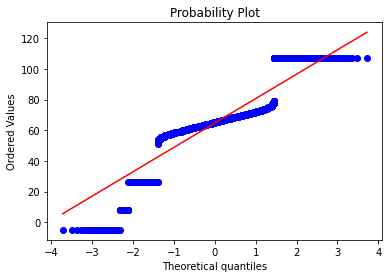

In [24]:
sns.distplot(train_df['Success_probability'] , fit=norm);

(mu, sigma) = norm.fit(train_df['Success_probability'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Success_probability distribution')

fig = plt.figure()
res = stats.probplot(train_df['Success_probability'], plot=plt)
plt.show() 

<AxesSubplot:>

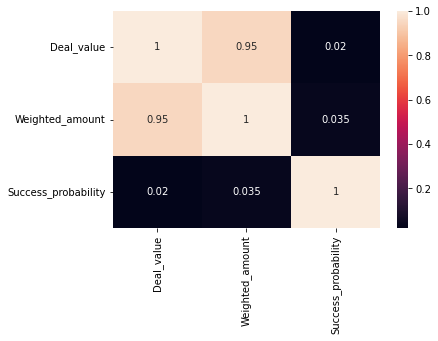

In [25]:
sns.heatmap(train_df[['Deal_value', 'Weighted_amount', 'Success_probability']]\
            .corr(), annot=True)

In [26]:
for col in train_df:
    print(col,train_df[col].nunique())

Deal_title 7007
Deal_value 6908
Weighted_amount 6481
Pitch 2
Lead_revenue 3
Fund_category 4
Geography 2
Lead_source 4
Level_of_meeting 3
Resource 6
Internal_rating 5
Success_probability 248
Year 3


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
train_df.columns

Index(['Deal_title', 'Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Geography', 'Lead_source', 'Level_of_meeting',
       'Resource', 'Internal_rating', 'Success_probability', 'Year'],
      dtype='object')

In [29]:
for column in train_df.columns:
    if train_df[column].dtype==object:
        train_df[column]=LabelEncoder().fit_transform(train_df[column])
    else:
        pass

Исходя из графиков мы видим что у нас имеются выбросы целевой колонки.

In [30]:
print('Доля значений с выбросами: {:.2f}%'.format((train_df[(train_df['Success_probability'] > 90) | (train_df['Success_probability'] < 45)].shape[0]/train_df.shape[0])*100))

Доля значений с выбросами: 15.46%


Я решил удалаить эти значения из первоначального набора данных и новый датасет назвал "df".

In [31]:
df = train_df.drop(train_df[(train_df['Success_probability'] > 90) | (train_df['Success_probability'] < 45)].index, axis = 0)


 mu = 65.25 and sigma = 5.08



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


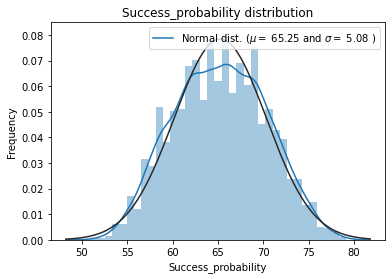

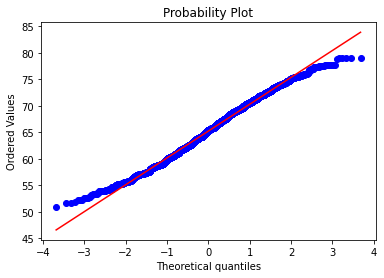

In [32]:
sns.distplot(df['Success_probability'] , fit=norm);

(mu, sigma) = norm.fit(df['Success_probability'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Success_probability distribution')

fig = plt.figure()
res = stats.probplot(df['Success_probability'], plot=plt)
plt.show() 

<AxesSubplot:ylabel='Success_probability'>

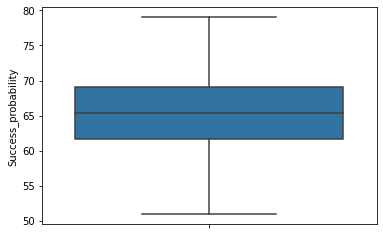

In [33]:
sns.boxplot(y = df['Success_probability'])

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
train_df[:]

,Deal_title,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability,Year
0,4326,320506.0,2.067264e+06,1,1,1,1,3,2,2,3,73.60,1
1,3979,39488.0,2.408768e+05,1,2,3,0,2,0,2,5,58.90,0
2,3081,359392.0,2.407926e+06,0,2,3,1,1,0,2,4,68.80,0
3,4966,76774.0,4.683214e+05,1,2,2,1,0,1,4,1,64.50,2
4,1739,483896.0,1.569884e+06,1,1,2,0,3,1,2,4,62.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,3702,192800.0,1.195360e+06,0,0,3,0,0,0,4,4,107.34,1
7003,4652,220208.0,1.453373e+06,1,0,0,0,1,1,4,3,26.35,1
7004,2896,253608.0,1.569884e+06,0,0,1,1,1,2,2,1,70.60,1
7005,6594,118615.0,7.947205e+05,0,2,1,1,3,2,4,3,-5.00,0


# Train_Test split

In [53]:
y = df.Success_probability
X = df.loc[:, df.columns != 'Success_probability']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# Построение моделей

# XGBRegressor

In [56]:
import xgboost as xgb

In [57]:
model_xgb = xgb.XGBRegressor(max_depth =1, n_jobs = -1)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_test_xgb = model_xgb.predict(X_test)

In [59]:
y_train_xgb = model_xgb.predict(X_train)

In [64]:
y_valid_xgb = model_xgb.predict(X_valid)

In [66]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}\nR^2 на необученных данных:  {}'
      .format(round(metrics.r2_score(y_train, y_train_xgb),2), round(metrics.r2_score(y_test, y_test_xgb),2),round(metrics.r2_score(y_valid, y_valid_xgb),2)))

print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_xgb),2), round(metrics.mean_squared_error(y_test, y_test_xgb),2)))

R^2 при обучении:  0.99,
R^2 при испытании:  0.99
R^2 на необученных данных:  0.98
MSE при обучении:  0.36,
MSE при испытании:  0.29


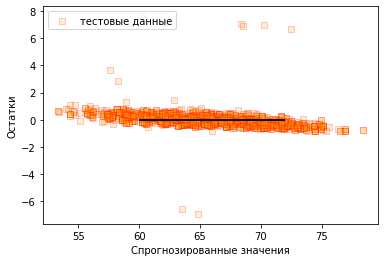

In [69]:
# plt.scatter(y_train_xgb, y_train_xgb-y_train, marker = 'o',c = 'steelblue', s = 35, alpha = .5, label='обучающие данные',edgecolor='black',)
# plt.scatter(y_test_xgb, y_test_xgb-y_test, marker = 's', s = 35, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')
plt.scatter(y_valid_xgb, y_valid_xgb-y_valid, marker = 's', s = 35, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')


plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=60, xmax=72, lw=2, color='black')

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
xgb1 = xgb.XGBRegressor()

In [43]:
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [1],
              'min_child_weight': [5, 6, 7],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200, 300, 400]}

In [44]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=False)

In [45]:
xgb_grid.fit(X_train, y_train)

[19:40:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [46]:
xgb_grid_model = xgb.XGBRegressor(**xgb_grid.best_params_)

In [47]:
xgb_grid_model.fit(X_train, y_train)

[19:40:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=1,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
y_test_xgb = xgb_grid_model.predict(X_test)

In [49]:
y_train_xgb = xgb_grid_model.predict(X_train)

In [50]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}'
      .format(round(metrics.r2_score(y_train, y_train_xgb),3), round(metrics.r2_score(y_test, y_test_xgb),3)))
print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_xgb),1), round(metrics.mean_squared_error(y_test, y_test_xgb),1)))

R^2 при обучении:  0.983,
R^2 при испытании:  0.986
MSE при обучении:  0.4,
MSE при испытании:  0.4


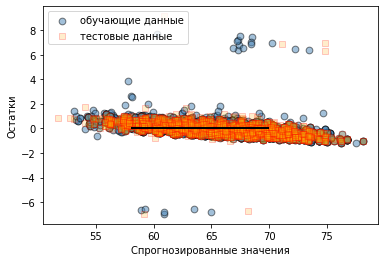

In [51]:
plt.scatter(y_train_xgb, y_train_xgb-y_train, marker = 'o',c = 'steelblue', s = 45, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_xgb, y_test_xgb-y_test, marker = 's', s = 45, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')
plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=58, xmax=70, lw=2, color='black')

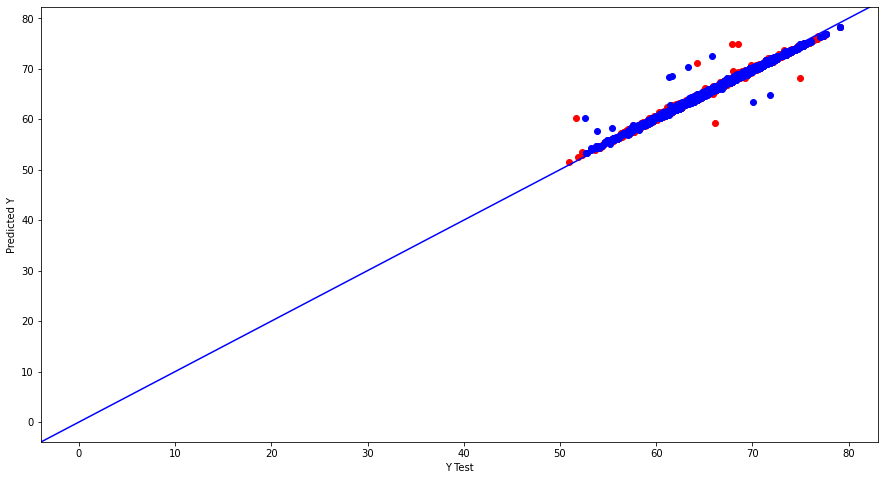

In [67]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_xgb, c='red')
plt.scatter(y_valid,y_valid_xgb, c='blue')


plt.axline([0, 0], [1, 1],c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model_rfr = RandomForestRegressor(random_state = 42)
model_rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [55]:
y_test_rfr = model_rfr.predict(X_test)

In [56]:
y_train_rfr = model_rfr.predict(X_train)

In [57]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}'
      .format(round(metrics.r2_score(y_train, y_train_rfr),2), round(metrics.r2_score(y_test, y_test_rfr),2)))

print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_rfr),1), round(metrics.mean_squared_error(y_test, y_test_rfr),1)))

R^2 при обучении:  1.0,
R^2 при испытании:  0.97
MSE при обучении:  0.1,
MSE при испытании:  0.7


In [108]:
y_train.shape

(3969,)

In [107]:
y_train_rfr.shape

(3969,)

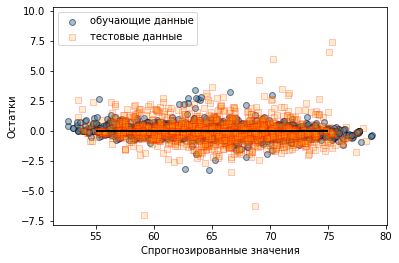

In [58]:
plt.scatter(y_train_rfr, y_train_rfr-y_train, marker = 'o',c = 'steelblue', s = 35, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_rfr, y_test_rfr-y_test, marker = 's', s = 35, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')
plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=55, xmax=75, lw=2, color='black')

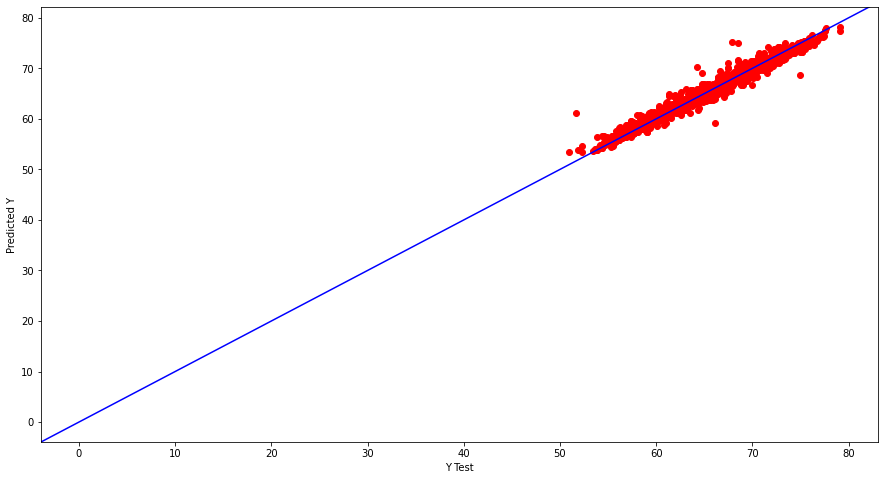

In [59]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_rfr, c='red')
plt.axline([0, 0], [1, 1],c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [60]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,6,7],
    'min_samples_leaf':[2,3,4,5],
    'min_samples_split':[2,3,4,5]
}

In [61]:
rfr_grid = GridSearchCV(model_rfr,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

In [62]:
rfr_grid.fit(X_train, y_train)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [63]:
rfr_grid_model = RandomForestRegressor(**rfr_grid.best_params_)

In [64]:
rfr_grid_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=200)

In [65]:
y_test_rfr = rfr_grid_model.predict(X_test)

In [66]:
y_train_rfr = rfr_grid_model.predict(X_train)

In [67]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}'
      .format(round(metrics.r2_score(y_train, y_train_rfr),3), round(metrics.r2_score(y_test, y_test_rfr),3)))

print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_rfr),2), round(metrics.mean_squared_error(y_test, y_test_rfr),2)))

R^2 при обучении:  0.941,
R^2 при испытании:  0.924
MSE при обучении:  1.52,
MSE при испытании:  1.94


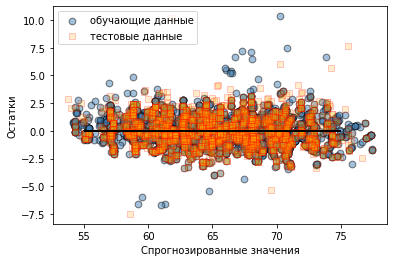

In [68]:
plt.scatter(y_train_rfr, y_train_rfr-y_train, marker = 'o',c = 'steelblue', s = 45, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_rfr, y_test_rfr-y_test, marker = 's', s = 45, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')
plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=55, xmax=75, lw=2, color='black')

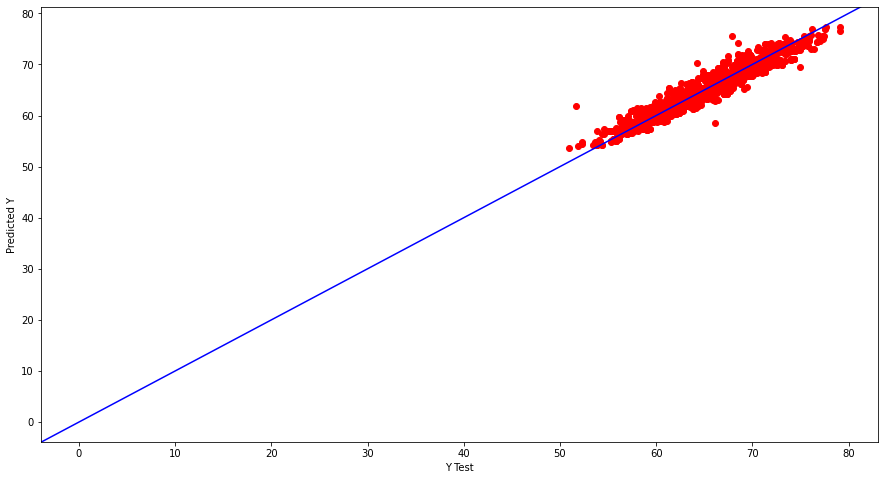

In [69]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_rfr, c='red')
plt.axline([0, 0], [1, 1],c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# LGBMRegressor

In [70]:
import lightgbm as lgb

In [71]:
model_lgb = lgb.LGBMRegressor(random_state = 42)
model_lgb.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [72]:
y_test_lgb = model_lgb.predict(X_test)

In [73]:
y_train_lgb = model_lgb.predict(X_train)

In [74]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}'
      .format(round(metrics.r2_score(y_train, y_train_lgb),3), round(metrics.r2_score(y_test, y_test_lgb),3)))

print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_lgb),1), round(metrics.mean_squared_error(y_test, y_test_lgb),1)))


R^2 при обучении:  0.993,
R^2 при испытании:  0.991
MSE при обучении:  0.2,
MSE при испытании:  0.2


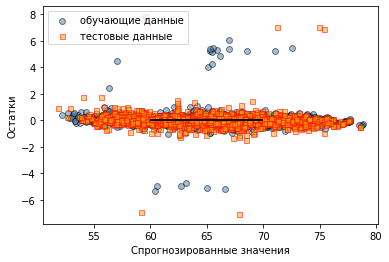

In [75]:
plt.scatter(y_train_lgb, y_train_lgb-y_train, marker = 'o',c = 'steelblue', s = 35, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_lgb, y_test_lgb-y_test, marker = 's', s = 25, c = 'orange', alpha = .5, label='тестовые данные', edgecolor='red')
plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=60, xmax=70, lw=2, color='black')

In [76]:
parameters = {'learning_rate': [0.001, 0.1, 0.12], 
 'n_estimators': [200],
 'num_leaves': [2, 3, 4],
 'colsample_bytree': [0.4, 0.6, 0.8], 
 'subsample': [0.05, 0.1], 
 'reg_alpha': [0.1],
 'reg_lambda': [0.1],
 'min_child_samples':[2,5,10,20,40,50]
             }

In [77]:
lgb_grid = GridSearchCV(model_lgb,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

In [78]:
%%time
lgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
CPU times: user 2.11 s, sys: 280 ms, total: 2.39 s
Wall time: 35 s


GridSearchCV(cv=2, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8],
                         'learning_rate': [0.001, 0.1, 0.12],
                         'min_child_samples': [2, 5, 10, 20, 40, 50],
                         'n_estimators': [200], 'num_leaves': [2, 3, 4],
                         'reg_alpha': [0.1], 'reg_lambda': [0.1],
                         'subsample': [0.05, 0.1]},
             verbose=True)

In [79]:
lgb_grid.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'min_child_samples': 2,
 'n_estimators': 200,
 'num_leaves': 4,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.05}

In [80]:
lgb_grid_model = lgb.LGBMRegressor(**lgb_grid.best_params_)

In [81]:
lgb_grid_model.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.4, min_child_samples=2, n_estimators=200,
              num_leaves=4, reg_alpha=0.1, reg_lambda=0.1, subsample=0.05)

In [82]:
y_test_lgb = lgb_grid_model.predict(X_test)

In [83]:
y_train_lgb = lgb_grid_model.predict(X_train)

In [84]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}'
      .format(round(metrics.r2_score(y_train, y_train_lgb),3), round(metrics.r2_score(y_test, y_test_lgb),3)))
print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_lgb),1), round(metrics.mean_squared_error(y_test, y_test_lgb),1)))

R^2 при обучении:  0.99,
R^2 при испытании:  0.992
MSE при обучении:  0.3,
MSE при испытании:  0.2


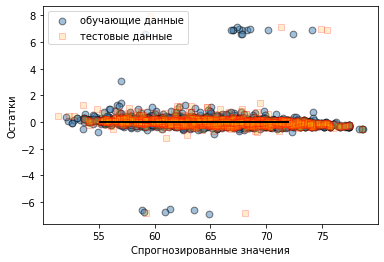

In [85]:
plt.scatter(y_train_lgb, y_train_lgb-y_train, marker = 'o',c = 'steelblue', s = 45, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_lgb, y_test_lgb-y_test, marker = 's', s = 45, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')
plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=55, xmax=72, lw=2, color='black')

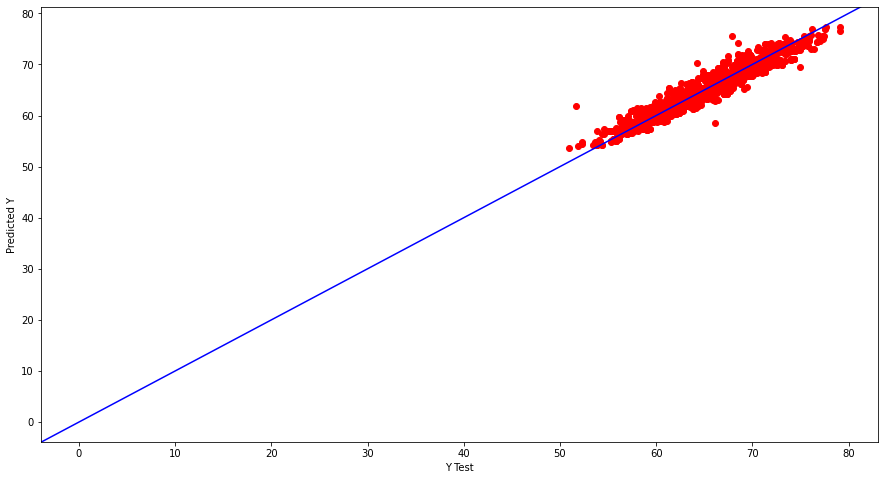

In [86]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_rfr, c='red')
plt.axline([0, 0], [1, 1],c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# CatBoostRegressor

In [87]:
from catboost import CatBoostRegressor

In [88]:
model_ctr = CatBoostRegressor(random_state =42)
model_ctr.fit(X_train, y_train)

Learning rate set to 0.050906
0:	learn: 4.8768454	total: 61.9ms	remaining: 1m 1s
1:	learn: 4.6894064	total: 63.2ms	remaining: 31.5s
2:	learn: 4.4938185	total: 64.4ms	remaining: 21.4s
3:	learn: 4.3096265	total: 65.5ms	remaining: 16.3s
4:	learn: 4.1383894	total: 66.6ms	remaining: 13.3s
5:	learn: 3.9845409	total: 67.6ms	remaining: 11.2s
6:	learn: 3.8337535	total: 68.8ms	remaining: 9.75s
7:	learn: 3.6946950	total: 69.9ms	remaining: 8.66s
8:	learn: 3.5603234	total: 71.2ms	remaining: 7.84s
9:	learn: 3.4320168	total: 72.3ms	remaining: 7.16s
10:	learn: 3.3111850	total: 73.6ms	remaining: 6.61s
11:	learn: 3.1884643	total: 74.7ms	remaining: 6.15s
12:	learn: 3.0807940	total: 75.9ms	remaining: 5.76s
13:	learn: 2.9765044	total: 77ms	remaining: 5.42s
14:	learn: 2.8719542	total: 78.3ms	remaining: 5.14s
15:	learn: 2.7745527	total: 79.5ms	remaining: 4.89s
16:	learn: 2.6838664	total: 80.9ms	remaining: 4.68s
17:	learn: 2.5941060	total: 82.3ms	remaining: 4.49s
18:	learn: 2.5093840	total: 83.7ms	remaining: 

261:	learn: 0.4544457	total: 375ms	remaining: 1.06s
262:	learn: 0.4540566	total: 377ms	remaining: 1.05s
263:	learn: 0.4530501	total: 378ms	remaining: 1.05s
264:	learn: 0.4527368	total: 379ms	remaining: 1.05s
265:	learn: 0.4525166	total: 380ms	remaining: 1.05s
266:	learn: 0.4521011	total: 381ms	remaining: 1.05s
267:	learn: 0.4518597	total: 383ms	remaining: 1.04s
268:	learn: 0.4514811	total: 384ms	remaining: 1.04s
269:	learn: 0.4511873	total: 385ms	remaining: 1.04s
270:	learn: 0.4506217	total: 386ms	remaining: 1.04s
271:	learn: 0.4500898	total: 387ms	remaining: 1.03s
272:	learn: 0.4497808	total: 388ms	remaining: 1.03s
273:	learn: 0.4494495	total: 390ms	remaining: 1.03s
274:	learn: 0.4491532	total: 391ms	remaining: 1.03s
275:	learn: 0.4487613	total: 392ms	remaining: 1.03s
276:	learn: 0.4485043	total: 393ms	remaining: 1.03s
277:	learn: 0.4482092	total: 395ms	remaining: 1.02s
278:	learn: 0.4478828	total: 396ms	remaining: 1.02s
279:	learn: 0.4476454	total: 398ms	remaining: 1.02s
280:	learn: 

422:	learn: 0.3990519	total: 564ms	remaining: 770ms
423:	learn: 0.3988751	total: 566ms	remaining: 768ms
424:	learn: 0.3985778	total: 567ms	remaining: 767ms
425:	learn: 0.3982992	total: 568ms	remaining: 765ms
426:	learn: 0.3979625	total: 569ms	remaining: 764ms
427:	learn: 0.3974754	total: 570ms	remaining: 762ms
428:	learn: 0.3971665	total: 571ms	remaining: 761ms
429:	learn: 0.3967914	total: 573ms	remaining: 759ms
430:	learn: 0.3963804	total: 574ms	remaining: 758ms
431:	learn: 0.3958512	total: 575ms	remaining: 756ms
432:	learn: 0.3956803	total: 577ms	remaining: 755ms
433:	learn: 0.3954075	total: 578ms	remaining: 754ms
434:	learn: 0.3948833	total: 579ms	remaining: 752ms
435:	learn: 0.3946079	total: 580ms	remaining: 751ms
436:	learn: 0.3944091	total: 582ms	remaining: 749ms
437:	learn: 0.3942155	total: 583ms	remaining: 748ms
438:	learn: 0.3940756	total: 584ms	remaining: 747ms
439:	learn: 0.3939087	total: 586ms	remaining: 745ms
440:	learn: 0.3937150	total: 587ms	remaining: 744ms
441:	learn: 

583:	learn: 0.3527739	total: 755ms	remaining: 538ms
584:	learn: 0.3526298	total: 756ms	remaining: 537ms
585:	learn: 0.3523158	total: 757ms	remaining: 535ms
586:	learn: 0.3520450	total: 759ms	remaining: 534ms
587:	learn: 0.3516350	total: 760ms	remaining: 532ms
588:	learn: 0.3512122	total: 761ms	remaining: 531ms
589:	learn: 0.3509904	total: 762ms	remaining: 530ms
590:	learn: 0.3508505	total: 763ms	remaining: 528ms
591:	learn: 0.3507094	total: 765ms	remaining: 527ms
592:	learn: 0.3504056	total: 766ms	remaining: 526ms
593:	learn: 0.3500958	total: 767ms	remaining: 524ms
594:	learn: 0.3499242	total: 768ms	remaining: 523ms
595:	learn: 0.3497461	total: 770ms	remaining: 522ms
596:	learn: 0.3496229	total: 771ms	remaining: 520ms
597:	learn: 0.3492244	total: 772ms	remaining: 519ms
598:	learn: 0.3491382	total: 773ms	remaining: 518ms
599:	learn: 0.3489340	total: 775ms	remaining: 516ms
600:	learn: 0.3488012	total: 776ms	remaining: 515ms
601:	learn: 0.3484675	total: 777ms	remaining: 514ms
602:	learn: 

741:	learn: 0.3175867	total: 945ms	remaining: 329ms
742:	learn: 0.3173150	total: 946ms	remaining: 327ms
743:	learn: 0.3170151	total: 948ms	remaining: 326ms
744:	learn: 0.3168137	total: 949ms	remaining: 325ms
745:	learn: 0.3166176	total: 951ms	remaining: 324ms
746:	learn: 0.3164635	total: 952ms	remaining: 322ms
747:	learn: 0.3163242	total: 953ms	remaining: 321ms
748:	learn: 0.3162336	total: 954ms	remaining: 320ms
749:	learn: 0.3160047	total: 956ms	remaining: 319ms
750:	learn: 0.3158314	total: 957ms	remaining: 317ms
751:	learn: 0.3157311	total: 958ms	remaining: 316ms
752:	learn: 0.3156502	total: 959ms	remaining: 315ms
753:	learn: 0.3154114	total: 960ms	remaining: 313ms
754:	learn: 0.3153143	total: 962ms	remaining: 312ms
755:	learn: 0.3150897	total: 963ms	remaining: 311ms
756:	learn: 0.3148328	total: 965ms	remaining: 310ms
757:	learn: 0.3146595	total: 966ms	remaining: 308ms
758:	learn: 0.3144502	total: 968ms	remaining: 307ms
759:	learn: 0.3141938	total: 969ms	remaining: 306ms
760:	learn: 

In [89]:
y_test_ctr = model_ctr.predict(X_test)

In [90]:
y_train_ctr = model_ctr.predict(X_train)

In [91]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}'
      .format(round(metrics.r2_score(y_train, y_train_ctr),3), round(metrics.r2_score(y_test, y_test_ctr),3)))
print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_ctr),1), round(metrics.mean_squared_error(y_test, y_test_ctr),1)))

R^2 при обучении:  0.997,
R^2 при испытании:  0.992
MSE при обучении:  0.1,
MSE при испытании:  0.2


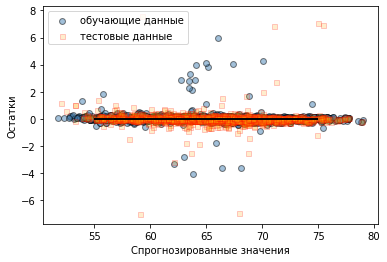

In [92]:
plt.scatter(y_train_ctr, y_train_ctr-y_train, marker = 'o',c = 'steelblue', s = 35, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_ctr, y_test_ctr-y_test, marker = 's', s = 25, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')
plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=55, xmax=75, lw=2, color='black')

In [93]:
CatBoostRegressor()

In [94]:
parameters = {'depth':[1,2],
          'iterations':[800, 1000, 1200],
          'learning_rate':[0.03,0.001,0.01], 
          'l2_leaf_reg':[1],
          'border_count':[10],
             }

In [95]:
cat_grid = GridSearchCV(model_ctr,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=False)

In [96]:
%%time
cat_grid.fit(X_train, y_train)

[19:40:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

148:	learn: 4.7251922	total: 120ms	remaining: 525ms
149:	learn: 4.7232654	total: 121ms	remaining: 523ms
150:	learn: 4.7213416	total: 121ms	remaining: 521ms
151:	learn: 4.7194208	total: 122ms	remaining: 519ms
152:	learn: 4.7175032	total: 122ms	remaining: 516ms
153:	learn: 4.7155886	total: 122ms	remaining: 514ms
154:	learn: 4.7136770	total: 123ms	remaining: 511ms
155:	learn: 4.7117685	total: 123ms	remaining: 508ms
156:	learn: 4.7098630	total: 123ms	remaining: 506ms
157:	learn: 4.7079605	total: 136ms	remaining: 553ms
158:	learn: 4.7060611	total: 137ms	remaining: 551ms
159:	learn: 4.7041647	total: 137ms	remaining: 548ms
160:	learn: 4.7022713	total: 137ms	remaining: 545ms
161:	learn: 4.7003810	total: 138ms	remaining: 543ms
162:	learn: 4.6984937	total: 138ms	remaining: 540ms
163:	learn: 4.6966094	total: 138ms	remaining: 537ms
164:	learn: 4.6947281	total: 139ms	remaining: 534ms
165:	learn: 4.6928498	total: 139ms	remaining: 532ms
166:	learn: 4.6909745	total: 140ms	remaining: 529ms
167:	learn: 

434:	learn: 1.2408916	total: 316ms	remaining: 265ms
435:	learn: 1.2389281	total: 317ms	remaining: 264ms
436:	learn: 1.2370834	total: 317ms	remaining: 264ms
437:	learn: 1.2351492	total: 318ms	remaining: 263ms
438:	learn: 1.2332940	total: 318ms	remaining: 262ms
439:	learn: 1.2314690	total: 319ms	remaining: 261ms
440:	learn: 1.2296115	total: 319ms	remaining: 260ms
441:	learn: 1.2277927	total: 320ms	remaining: 259ms
442:	learn: 1.2259752	total: 321ms	remaining: 258ms
443:	learn: 1.2240984	total: 321ms	remaining: 258ms
444:	learn: 1.2222709	total: 322ms	remaining: 257ms
445:	learn: 1.2205497	total: 322ms	remaining: 256ms
446:	learn: 1.2187208	total: 323ms	remaining: 255ms
447:	learn: 1.2169399	total: 323ms	remaining: 254ms
448:	learn: 1.2151272	total: 324ms	remaining: 253ms
449:	learn: 1.2133373	total: 325ms	remaining: 252ms
450:	learn: 1.2116112	total: 325ms	remaining: 251ms
451:	learn: 1.2098807	total: 325ms	remaining: 250ms
452:	learn: 1.2081641	total: 326ms	remaining: 249ms
453:	learn: 

747:	learn: 0.8538988	total: 496ms	remaining: 167ms
748:	learn: 0.8531030	total: 496ms	remaining: 166ms
749:	learn: 0.8522997	total: 496ms	remaining: 165ms
750:	learn: 0.8514719	total: 498ms	remaining: 165ms
751:	learn: 0.8506871	total: 499ms	remaining: 165ms
752:	learn: 0.8498795	total: 500ms	remaining: 164ms
753:	learn: 0.8491026	total: 500ms	remaining: 163ms
754:	learn: 0.8483168	total: 500ms	remaining: 162ms
755:	learn: 0.8475550	total: 501ms	remaining: 162ms
756:	learn: 0.8467639	total: 501ms	remaining: 161ms
757:	learn: 0.8460263	total: 502ms	remaining: 160ms
758:	learn: 0.8452418	total: 502ms	remaining: 159ms
759:	learn: 0.8444854	total: 503ms	remaining: 159ms
760:	learn: 0.8437405	total: 503ms	remaining: 158ms
761:	learn: 0.8429632	total: 505ms	remaining: 158ms
762:	learn: 0.8421887	total: 506ms	remaining: 157ms
763:	learn: 0.8414426	total: 506ms	remaining: 156ms
764:	learn: 0.8407338	total: 507ms	remaining: 156ms
765:	learn: 0.8399800	total: 507ms	remaining: 155ms
766:	learn: 

458:	learn: 1.2317509	total: 220ms	remaining: 355ms
459:	learn: 1.2300144	total: 220ms	remaining: 354ms
460:	learn: 1.2282593	total: 221ms	remaining: 354ms
461:	learn: 1.2265220	total: 221ms	remaining: 353ms
462:	learn: 1.2248526	total: 222ms	remaining: 353ms
463:	learn: 1.2231419	total: 222ms	remaining: 352ms
464:	learn: 1.2214273	total: 222ms	remaining: 351ms
465:	learn: 1.2199055	total: 223ms	remaining: 351ms
466:	learn: 1.2182638	total: 223ms	remaining: 350ms
467:	learn: 1.2167125	total: 224ms	remaining: 350ms
468:	learn: 1.2150055	total: 224ms	remaining: 349ms
469:	learn: 1.2133093	total: 224ms	remaining: 348ms
470:	learn: 1.2116615	total: 225ms	remaining: 348ms
471:	learn: 1.2099865	total: 225ms	remaining: 347ms
472:	learn: 1.2082200	total: 225ms	remaining: 346ms
473:	learn: 1.2065825	total: 226ms	remaining: 346ms
474:	learn: 1.2048593	total: 226ms	remaining: 345ms
475:	learn: 1.2031940	total: 226ms	remaining: 344ms
476:	learn: 1.2015304	total: 227ms	remaining: 344ms
477:	learn: 

774:	learn: 0.8547817	total: 409ms	remaining: 224ms
775:	learn: 0.8540471	total: 409ms	remaining: 224ms
776:	learn: 0.8532526	total: 410ms	remaining: 223ms
777:	learn: 0.8525619	total: 410ms	remaining: 222ms
778:	learn: 0.8518255	total: 410ms	remaining: 222ms
779:	learn: 0.8510795	total: 411ms	remaining: 221ms
780:	learn: 0.8503173	total: 411ms	remaining: 221ms
781:	learn: 0.8495776	total: 411ms	remaining: 220ms
782:	learn: 0.8488049	total: 412ms	remaining: 219ms
783:	learn: 0.8480891	total: 412ms	remaining: 219ms
784:	learn: 0.8473135	total: 413ms	remaining: 218ms
785:	learn: 0.8466552	total: 413ms	remaining: 218ms
786:	learn: 0.8458974	total: 414ms	remaining: 217ms
787:	learn: 0.8451653	total: 414ms	remaining: 217ms
788:	learn: 0.8444196	total: 415ms	remaining: 216ms
789:	learn: 0.8436793	total: 415ms	remaining: 215ms
790:	learn: 0.8429789	total: 415ms	remaining: 215ms
791:	learn: 0.8422480	total: 416ms	remaining: 214ms
792:	learn: 0.8415268	total: 416ms	remaining: 214ms
793:	learn: 

35:	learn: 4.4493438	total: 13.2ms	remaining: 428ms
36:	learn: 4.4356132	total: 13.6ms	remaining: 427ms
37:	learn: 4.4221141	total: 13.9ms	remaining: 426ms
38:	learn: 4.4088434	total: 14.2ms	remaining: 424ms
39:	learn: 4.3957975	total: 14.6ms	remaining: 422ms
40:	learn: 4.3829734	total: 14.9ms	remaining: 421ms
41:	learn: 4.3703677	total: 15.2ms	remaining: 419ms
42:	learn: 4.3579772	total: 15.5ms	remaining: 418ms
43:	learn: 4.3457987	total: 16ms	remaining: 422ms
44:	learn: 4.3338292	total: 16.5ms	remaining: 423ms
45:	learn: 4.3220654	total: 16.9ms	remaining: 424ms
46:	learn: 4.3105043	total: 17.4ms	remaining: 427ms
47:	learn: 4.2991430	total: 17.8ms	remaining: 426ms
48:	learn: 4.2879782	total: 18.1ms	remaining: 425ms
49:	learn: 4.2770072	total: 20.8ms	remaining: 479ms
50:	learn: 4.2662268	total: 21.3ms	remaining: 480ms
51:	learn: 4.2586991	total: 21.7ms	remaining: 480ms
52:	learn: 4.2480873	total: 22.2ms	remaining: 480ms
53:	learn: 4.2376606	total: 22.6ms	remaining: 480ms
54:	learn: 4.2

217:	learn: 1.2186208	total: 164ms	remaining: 439ms
218:	learn: 1.2145608	total: 165ms	remaining: 438ms
219:	learn: 1.2102586	total: 165ms	remaining: 436ms
220:	learn: 1.2041402	total: 166ms	remaining: 434ms
221:	learn: 1.2000857	total: 167ms	remaining: 434ms
222:	learn: 1.1961766	total: 167ms	remaining: 433ms
223:	learn: 1.1896199	total: 168ms	remaining: 432ms
224:	learn: 1.1855780	total: 168ms	remaining: 430ms
225:	learn: 1.1817389	total: 169ms	remaining: 429ms
226:	learn: 1.1758624	total: 169ms	remaining: 428ms
227:	learn: 1.1718180	total: 170ms	remaining: 426ms
228:	learn: 1.1655620	total: 170ms	remaining: 425ms
229:	learn: 1.1615590	total: 171ms	remaining: 424ms
230:	learn: 1.1578667	total: 171ms	remaining: 422ms
231:	learn: 1.1522371	total: 172ms	remaining: 421ms
232:	learn: 1.1463006	total: 172ms	remaining: 419ms
233:	learn: 1.1422992	total: 173ms	remaining: 418ms
234:	learn: 1.1384958	total: 173ms	remaining: 416ms
235:	learn: 1.1346711	total: 174ms	remaining: 415ms
236:	learn: 

287:	learn: 4.3738566	total: 194ms	remaining: 344ms
288:	learn: 4.3716353	total: 194ms	remaining: 344ms
289:	learn: 4.3694172	total: 195ms	remaining: 343ms
290:	learn: 4.3673483	total: 196ms	remaining: 342ms
291:	learn: 4.3651362	total: 196ms	remaining: 341ms
292:	learn: 4.3628958	total: 197ms	remaining: 341ms
293:	learn: 4.3606891	total: 197ms	remaining: 340ms
294:	learn: 4.3584857	total: 198ms	remaining: 339ms
295:	learn: 4.3562856	total: 199ms	remaining: 338ms
296:	learn: 4.3542692	total: 199ms	remaining: 337ms
297:	learn: 4.3520746	total: 201ms	remaining: 338ms
298:	learn: 4.3500361	total: 201ms	remaining: 337ms
299:	learn: 4.3478127	total: 202ms	remaining: 336ms
300:	learn: 4.3456256	total: 202ms	remaining: 335ms
301:	learn: 4.3435953	total: 203ms	remaining: 334ms
302:	learn: 4.3413800	total: 203ms	remaining: 333ms
303:	learn: 4.3392004	total: 203ms	remaining: 332ms
304:	learn: 4.3369905	total: 204ms	remaining: 331ms
305:	learn: 4.3347839	total: 204ms	remaining: 330ms
306:	learn: 

289:	learn: 2.1762136	total: 209ms	remaining: 368ms
290:	learn: 2.1720173	total: 211ms	remaining: 369ms
291:	learn: 2.1679506	total: 213ms	remaining: 370ms
292:	learn: 2.1640034	total: 213ms	remaining: 369ms
293:	learn: 2.1598763	total: 214ms	remaining: 368ms
294:	learn: 2.1558219	total: 214ms	remaining: 367ms
295:	learn: 2.1519245	total: 215ms	remaining: 365ms
296:	learn: 2.1477932	total: 215ms	remaining: 364ms
297:	learn: 2.1437362	total: 216ms	remaining: 363ms
298:	learn: 2.1398251	total: 216ms	remaining: 362ms
299:	learn: 2.1357947	total: 217ms	remaining: 361ms
300:	learn: 2.1318009	total: 217ms	remaining: 360ms
301:	learn: 2.1279096	total: 218ms	remaining: 359ms
302:	learn: 2.1241001	total: 218ms	remaining: 358ms
303:	learn: 2.1203122	total: 219ms	remaining: 358ms
304:	learn: 2.1163593	total: 220ms	remaining: 357ms
305:	learn: 2.1125280	total: 220ms	remaining: 356ms
306:	learn: 2.1086881	total: 221ms	remaining: 355ms
307:	learn: 2.1049321	total: 221ms	remaining: 354ms
308:	learn: 

35:	learn: 4.2100520	total: 22.3ms	remaining: 598ms
36:	learn: 4.1896070	total: 23.1ms	remaining: 600ms
37:	learn: 4.1694708	total: 23.7ms	remaining: 600ms
38:	learn: 4.1496552	total: 24.4ms	remaining: 600ms
39:	learn: 4.1313039	total: 25ms	remaining: 600ms
40:	learn: 4.1138198	total: 25.7ms	remaining: 600ms
41:	learn: 4.0946069	total: 26.3ms	remaining: 600ms
42:	learn: 4.0756490	total: 26.9ms	remaining: 600ms
43:	learn: 4.0603261	total: 27.6ms	remaining: 600ms
44:	learn: 4.0417750	total: 28.2ms	remaining: 599ms
45:	learn: 4.0235092	total: 29.3ms	remaining: 608ms
46:	learn: 4.0053694	total: 29.8ms	remaining: 604ms
47:	learn: 3.9896841	total: 30.2ms	remaining: 599ms
48:	learn: 3.9720014	total: 30.6ms	remaining: 594ms
49:	learn: 3.9545932	total: 31ms	remaining: 589ms
50:	learn: 3.9372685	total: 31.4ms	remaining: 584ms
51:	learn: 3.9202135	total: 31.8ms	remaining: 580ms
52:	learn: 3.9034249	total: 32.2ms	remaining: 576ms
53:	learn: 3.8881719	total: 32.6ms	remaining: 572ms
54:	learn: 3.871

303:	learn: 4.3392004	total: 223ms	remaining: 510ms
304:	learn: 4.3369905	total: 223ms	remaining: 508ms
305:	learn: 4.3347839	total: 224ms	remaining: 507ms
306:	learn: 4.3326115	total: 224ms	remaining: 506ms
307:	learn: 4.3305972	total: 225ms	remaining: 505ms
308:	learn: 4.3287041	total: 225ms	remaining: 504ms
309:	learn: 4.3267204	total: 226ms	remaining: 503ms
310:	learn: 4.3247141	total: 226ms	remaining: 501ms
311:	learn: 4.3225232	total: 227ms	remaining: 500ms
312:	learn: 4.3205478	total: 227ms	remaining: 498ms
313:	learn: 4.3183916	total: 227ms	remaining: 497ms
314:	learn: 4.3162085	total: 228ms	remaining: 496ms
315:	learn: 4.3140287	total: 228ms	remaining: 495ms
316:	learn: 4.3118797	total: 229ms	remaining: 493ms
317:	learn: 4.3099587	total: 229ms	remaining: 492ms
318:	learn: 4.3080886	total: 230ms	remaining: 491ms
319:	learn: 4.3059184	total: 230ms	remaining: 489ms
320:	learn: 4.3037514	total: 233ms	remaining: 493ms
321:	learn: 4.3015876	total: 233ms	remaining: 492ms
322:	learn: 

761:	learn: 1.0852381	total: 563ms	remaining: 28.1ms
762:	learn: 1.0842495	total: 564ms	remaining: 27.3ms
763:	learn: 1.0822744	total: 564ms	remaining: 26.6ms
764:	learn: 1.0812832	total: 565ms	remaining: 25.9ms
765:	learn: 1.0802784	total: 566ms	remaining: 25.1ms
766:	learn: 1.0792568	total: 566ms	remaining: 24.4ms
767:	learn: 1.0773453	total: 567ms	remaining: 23.6ms
768:	learn: 1.0753976	total: 568ms	remaining: 22.9ms
769:	learn: 1.0743947	total: 569ms	remaining: 22.2ms
770:	learn: 1.0733656	total: 569ms	remaining: 21.4ms
771:	learn: 1.0723642	total: 570ms	remaining: 20.7ms
772:	learn: 1.0704471	total: 570ms	remaining: 19.9ms
773:	learn: 1.0685666	total: 571ms	remaining: 19.2ms
774:	learn: 1.0675835	total: 571ms	remaining: 18.4ms
775:	learn: 1.0665898	total: 571ms	remaining: 17.7ms
776:	learn: 1.0647389	total: 572ms	remaining: 16.9ms
777:	learn: 1.0637621	total: 573ms	remaining: 16.2ms
778:	learn: 1.0627997	total: 573ms	remaining: 15.4ms
779:	learn: 1.0618520	total: 573ms	remaining: 

959:	learn: 0.5591495	total: 643ms	remaining: 26.8ms
960:	learn: 0.5591120	total: 644ms	remaining: 26.1ms
961:	learn: 0.5590762	total: 644ms	remaining: 25.4ms
962:	learn: 0.5590439	total: 645ms	remaining: 24.8ms
963:	learn: 0.5590084	total: 645ms	remaining: 24.1ms
964:	learn: 0.5589712	total: 646ms	remaining: 23.4ms
965:	learn: 0.5589424	total: 646ms	remaining: 22.8ms
966:	learn: 0.5589079	total: 647ms	remaining: 22.1ms
967:	learn: 0.5588705	total: 648ms	remaining: 21.4ms
968:	learn: 0.5588386	total: 648ms	remaining: 20.7ms
969:	learn: 0.5588114	total: 649ms	remaining: 20.1ms
970:	learn: 0.5587811	total: 650ms	remaining: 19.4ms
971:	learn: 0.5587470	total: 650ms	remaining: 18.7ms
972:	learn: 0.5587134	total: 651ms	remaining: 18.1ms
973:	learn: 0.5586496	total: 651ms	remaining: 17.4ms
974:	learn: 0.5586135	total: 652ms	remaining: 16.7ms
975:	learn: 0.5585891	total: 652ms	remaining: 16ms
976:	learn: 0.5585588	total: 653ms	remaining: 15.4ms
977:	learn: 0.5585303	total: 653ms	remaining: 14

871:	learn: 0.5635871	total: 610ms	remaining: 230ms
872:	learn: 0.5635323	total: 611ms	remaining: 229ms
873:	learn: 0.5634806	total: 611ms	remaining: 228ms
874:	learn: 0.5634467	total: 612ms	remaining: 227ms
875:	learn: 0.5634004	total: 613ms	remaining: 227ms
876:	learn: 0.5633376	total: 613ms	remaining: 226ms
877:	learn: 0.5632785	total: 614ms	remaining: 225ms
878:	learn: 0.5632332	total: 615ms	remaining: 225ms
879:	learn: 0.5631778	total: 615ms	remaining: 224ms
880:	learn: 0.5631380	total: 616ms	remaining: 223ms
881:	learn: 0.5628677	total: 616ms	remaining: 222ms
882:	learn: 0.5628199	total: 617ms	remaining: 221ms
883:	learn: 0.5627870	total: 618ms	remaining: 221ms
884:	learn: 0.5627373	total: 619ms	remaining: 220ms
885:	learn: 0.5626907	total: 619ms	remaining: 219ms
886:	learn: 0.5626579	total: 620ms	remaining: 219ms
887:	learn: 0.5626016	total: 620ms	remaining: 218ms
888:	learn: 0.5625566	total: 621ms	remaining: 217ms
889:	learn: 0.5625029	total: 621ms	remaining: 216ms
890:	learn: 

535:	learn: 1.4356965	total: 305ms	remaining: 377ms
536:	learn: 1.4337487	total: 305ms	remaining: 377ms
537:	learn: 1.4317913	total: 306ms	remaining: 376ms
538:	learn: 1.4297612	total: 306ms	remaining: 376ms
539:	learn: 1.4278021	total: 307ms	remaining: 375ms
540:	learn: 1.4258748	total: 307ms	remaining: 374ms
541:	learn: 1.4239779	total: 308ms	remaining: 374ms
542:	learn: 1.4220513	total: 308ms	remaining: 373ms
543:	learn: 1.4202032	total: 309ms	remaining: 372ms
544:	learn: 1.4184734	total: 309ms	remaining: 372ms
545:	learn: 1.4165423	total: 310ms	remaining: 371ms
546:	learn: 1.4145983	total: 310ms	remaining: 371ms
547:	learn: 1.4127829	total: 311ms	remaining: 370ms
548:	learn: 1.4109159	total: 311ms	remaining: 369ms
549:	learn: 1.4090409	total: 312ms	remaining: 368ms
550:	learn: 1.4071563	total: 312ms	remaining: 368ms
551:	learn: 1.4052825	total: 313ms	remaining: 367ms
552:	learn: 1.4034449	total: 313ms	remaining: 367ms
553:	learn: 1.4017521	total: 314ms	remaining: 366ms
554:	learn: 

0:	learn: 4.9954438	total: 812us	remaining: 974ms
1:	learn: 4.9050302	total: 1.85ms	remaining: 1.11s
2:	learn: 4.8190337	total: 2.73ms	remaining: 1.09s
3:	learn: 4.7366889	total: 3.59ms	remaining: 1.07s
4:	learn: 4.6549240	total: 4.45ms	remaining: 1.06s
5:	learn: 4.5766528	total: 5.36ms	remaining: 1.07s
6:	learn: 4.5017603	total: 6.17ms	remaining: 1.05s
7:	learn: 4.4301335	total: 6.99ms	remaining: 1.04s
8:	learn: 4.3616616	total: 7.81ms	remaining: 1.03s
9:	learn: 4.2962360	total: 8.74ms	remaining: 1.04s
10:	learn: 4.2337499	total: 9.61ms	remaining: 1.04s
11:	learn: 4.1693481	total: 10.4ms	remaining: 1.03s
12:	learn: 4.1078264	total: 11.3ms	remaining: 1.03s
13:	learn: 4.0490834	total: 12.2ms	remaining: 1.03s
14:	learn: 3.9945071	total: 12.9ms	remaining: 1.02s
15:	learn: 3.9424632	total: 13.5ms	remaining: 1s
16:	learn: 3.8894616	total: 14.2ms	remaining: 988ms
17:	learn: 3.8412942	total: 15ms	remaining: 983ms
18:	learn: 3.7921352	total: 15.7ms	remaining: 979ms
19:	learn: 3.7490656	total: 

287:	learn: 0.9683324	total: 183ms	remaining: 579ms
288:	learn: 0.9642022	total: 184ms	remaining: 579ms
289:	learn: 0.9617736	total: 184ms	remaining: 578ms
290:	learn: 0.9593400	total: 185ms	remaining: 577ms
291:	learn: 0.9569753	total: 185ms	remaining: 576ms
292:	learn: 0.9545633	total: 186ms	remaining: 575ms
293:	learn: 0.9521199	total: 186ms	remaining: 575ms
294:	learn: 0.9497674	total: 187ms	remaining: 574ms
295:	learn: 0.9475852	total: 188ms	remaining: 573ms
296:	learn: 0.9435364	total: 188ms	remaining: 572ms
297:	learn: 0.9394544	total: 189ms	remaining: 572ms
298:	learn: 0.9369257	total: 190ms	remaining: 571ms
299:	learn: 0.9346952	total: 190ms	remaining: 570ms
300:	learn: 0.9323047	total: 191ms	remaining: 570ms
301:	learn: 0.9301900	total: 191ms	remaining: 569ms
302:	learn: 0.9279182	total: 192ms	remaining: 568ms
303:	learn: 0.9257476	total: 193ms	remaining: 567ms
304:	learn: 0.9218566	total: 193ms	remaining: 567ms
305:	learn: 0.9196697	total: 194ms	remaining: 566ms
306:	learn: 

605:	learn: 0.6053419	total: 366ms	remaining: 359ms
606:	learn: 0.6051594	total: 367ms	remaining: 358ms
607:	learn: 0.6047463	total: 367ms	remaining: 358ms
608:	learn: 0.6044404	total: 368ms	remaining: 357ms
609:	learn: 0.6041589	total: 369ms	remaining: 356ms
610:	learn: 0.6039819	total: 369ms	remaining: 356ms
611:	learn: 0.6036071	total: 370ms	remaining: 355ms
612:	learn: 0.6034319	total: 370ms	remaining: 355ms
613:	learn: 0.6031135	total: 371ms	remaining: 354ms
614:	learn: 0.6029442	total: 371ms	remaining: 353ms
615:	learn: 0.6027660	total: 372ms	remaining: 352ms
616:	learn: 0.6026008	total: 372ms	remaining: 352ms
617:	learn: 0.6024360	total: 373ms	remaining: 351ms
618:	learn: 0.6022740	total: 373ms	remaining: 350ms
619:	learn: 0.6019741	total: 374ms	remaining: 350ms
620:	learn: 0.6018134	total: 374ms	remaining: 349ms
621:	learn: 0.6016570	total: 375ms	remaining: 348ms
622:	learn: 0.6012721	total: 376ms	remaining: 348ms
623:	learn: 0.6009097	total: 377ms	remaining: 348ms
624:	learn: 

935:	learn: 0.5738368	total: 549ms	remaining: 155ms
936:	learn: 0.5738021	total: 550ms	remaining: 154ms
937:	learn: 0.5737704	total: 551ms	remaining: 154ms
938:	learn: 0.5737399	total: 551ms	remaining: 153ms
939:	learn: 0.5737207	total: 552ms	remaining: 153ms
940:	learn: 0.5736826	total: 553ms	remaining: 152ms
941:	learn: 0.5736520	total: 553ms	remaining: 152ms
942:	learn: 0.5736301	total: 554ms	remaining: 151ms
943:	learn: 0.5736067	total: 555ms	remaining: 150ms
944:	learn: 0.5735779	total: 555ms	remaining: 150ms
945:	learn: 0.5735456	total: 556ms	remaining: 149ms
946:	learn: 0.5735278	total: 556ms	remaining: 149ms
947:	learn: 0.5734928	total: 557ms	remaining: 148ms
948:	learn: 0.5734628	total: 557ms	remaining: 147ms
949:	learn: 0.5734441	total: 558ms	remaining: 147ms
950:	learn: 0.5734249	total: 559ms	remaining: 146ms
951:	learn: 0.5734039	total: 559ms	remaining: 146ms
952:	learn: 0.5733828	total: 560ms	remaining: 145ms
953:	learn: 0.5733615	total: 560ms	remaining: 144ms
954:	learn: 

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fdeb38042e0>,
             n_jobs=-1,
             param_grid={'border_count': [10], 'depth': [1, 2],
                         'iterations': [800, 1000, 1200], 'l2_leaf_reg': [1],
                         'learning_rate': [0.03, 0.001, 0.01]},
             verbose=False)

In [97]:
cat_grid.best_params_

{'border_count': 10,
 'depth': 2,
 'iterations': 1200,
 'l2_leaf_reg': 1,
 'learning_rate': 0.03}

In [98]:
cat_grid_model = CatBoostRegressor(**cat_grid.best_params_)

In [99]:
cat_grid_model.fit(X_train, y_train)

0:	learn: 4.9985493	total: 622us	remaining: 747ms
1:	learn: 4.9111668	total: 1.26ms	remaining: 756ms
2:	learn: 4.8220627	total: 1.84ms	remaining: 736ms
3:	learn: 4.7366889	total: 2.52ms	remaining: 752ms
4:	learn: 4.6578744	total: 3.13ms	remaining: 748ms
5:	learn: 4.5784095	total: 3.73ms	remaining: 743ms
6:	learn: 4.5052233	total: 4.28ms	remaining: 729ms
7:	learn: 4.4313021	total: 4.92ms	remaining: 733ms
8:	learn: 4.3633865	total: 5.56ms	remaining: 736ms
9:	learn: 4.2985008	total: 6.21ms	remaining: 739ms
10:	learn: 4.2316781	total: 6.84ms	remaining: 740ms
11:	learn: 4.1715434	total: 7.38ms	remaining: 731ms
12:	learn: 4.1094466	total: 7.95ms	remaining: 726ms
13:	learn: 4.0537492	total: 8.63ms	remaining: 732ms
14:	learn: 3.9960744	total: 9.26ms	remaining: 731ms
15:	learn: 3.9410340	total: 9.93ms	remaining: 734ms
16:	learn: 3.8885318	total: 11.3ms	remaining: 789ms
17:	learn: 3.8399134	total: 12.1ms	remaining: 792ms
18:	learn: 3.7983612	total: 12.7ms	remaining: 790ms
19:	learn: 3.7510922	to

308:	learn: 0.9222573	total: 183ms	remaining: 529ms
309:	learn: 0.9203347	total: 184ms	remaining: 529ms
310:	learn: 0.9184401	total: 185ms	remaining: 528ms
311:	learn: 0.9165051	total: 185ms	remaining: 528ms
312:	learn: 0.9146102	total: 186ms	remaining: 527ms
313:	learn: 0.9101641	total: 187ms	remaining: 527ms
314:	learn: 0.9059358	total: 187ms	remaining: 526ms
315:	learn: 0.9041135	total: 188ms	remaining: 525ms
316:	learn: 0.9021953	total: 188ms	remaining: 525ms
317:	learn: 0.9003491	total: 189ms	remaining: 524ms
318:	learn: 0.8961220	total: 190ms	remaining: 523ms
319:	learn: 0.8943505	total: 190ms	remaining: 523ms
320:	learn: 0.8904017	total: 191ms	remaining: 522ms
321:	learn: 0.8886211	total: 191ms	remaining: 521ms
322:	learn: 0.8868772	total: 192ms	remaining: 521ms
323:	learn: 0.8828892	total: 192ms	remaining: 520ms
324:	learn: 0.8810933	total: 193ms	remaining: 519ms
325:	learn: 0.8793981	total: 193ms	remaining: 518ms
326:	learn: 0.8777627	total: 194ms	remaining: 518ms
327:	learn: 

601:	learn: 0.6072172	total: 365ms	remaining: 362ms
602:	learn: 0.6070274	total: 366ms	remaining: 362ms
603:	learn: 0.6068467	total: 366ms	remaining: 361ms
604:	learn: 0.6064246	total: 367ms	remaining: 361ms
605:	learn: 0.6062388	total: 367ms	remaining: 360ms
606:	learn: 0.6060569	total: 368ms	remaining: 359ms
607:	learn: 0.6058868	total: 368ms	remaining: 359ms
608:	learn: 0.6055409	total: 369ms	remaining: 358ms
609:	learn: 0.6053701	total: 369ms	remaining: 357ms
610:	learn: 0.6049653	total: 370ms	remaining: 357ms
611:	learn: 0.6046449	total: 370ms	remaining: 356ms
612:	learn: 0.6043185	total: 371ms	remaining: 355ms
613:	learn: 0.6039429	total: 371ms	remaining: 354ms
614:	learn: 0.6037728	total: 372ms	remaining: 354ms
615:	learn: 0.6036111	total: 372ms	remaining: 353ms
616:	learn: 0.6034441	total: 373ms	remaining: 352ms
617:	learn: 0.6030662	total: 373ms	remaining: 352ms
618:	learn: 0.6027158	total: 374ms	remaining: 351ms
619:	learn: 0.6025474	total: 374ms	remaining: 350ms
620:	learn: 

938:	learn: 0.5741066	total: 548ms	remaining: 152ms
939:	learn: 0.5740644	total: 548ms	remaining: 152ms
940:	learn: 0.5740296	total: 549ms	remaining: 151ms
941:	learn: 0.5740082	total: 549ms	remaining: 150ms
942:	learn: 0.5739791	total: 550ms	remaining: 150ms
943:	learn: 0.5739469	total: 550ms	remaining: 149ms
944:	learn: 0.5739147	total: 551ms	remaining: 149ms
945:	learn: 0.5738774	total: 551ms	remaining: 148ms
946:	learn: 0.5738499	total: 552ms	remaining: 147ms
947:	learn: 0.5738272	total: 552ms	remaining: 147ms
948:	learn: 0.5738001	total: 553ms	remaining: 146ms
949:	learn: 0.5737677	total: 553ms	remaining: 146ms
950:	learn: 0.5737500	total: 554ms	remaining: 145ms
951:	learn: 0.5737276	total: 554ms	remaining: 144ms
952:	learn: 0.5737090	total: 555ms	remaining: 144ms
953:	learn: 0.5736879	total: 555ms	remaining: 143ms
954:	learn: 0.5736555	total: 556ms	remaining: 143ms
955:	learn: 0.5736350	total: 557ms	remaining: 142ms
956:	learn: 0.5736027	total: 557ms	remaining: 141ms
957:	learn: 

In [100]:
y_test_cat = cat_grid_model.predict(X_test)

In [101]:
y_train_cat = cat_grid_model.predict(X_train)

In [102]:
print('R^2 при обучении:  {},\nR^2 при испытании:  {}'
      .format(round(metrics.r2_score(y_train, y_train_cat),3), round(metrics.r2_score(y_test, y_test_cat),3)))
print('MSE при обучении:  {},\nMSE при испытании:  {}'
      .format(round(metrics.mean_squared_error(y_train, y_train_cat),1), round(metrics.mean_squared_error(y_test, y_test_cat),1)))

R^2 при обучении:  0.988,
R^2 при испытании:  0.99
MSE при обучении:  0.3,
MSE при испытании:  0.2


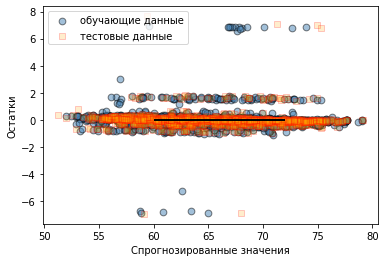

In [103]:
plt.scatter(y_train_cat, y_train_cat-y_train, marker = 'o',c = 'steelblue', s = 45, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_cat, y_test_cat-y_test, marker = 's', s = 45, c = 'orange', alpha = .2, label='тестовые данные', edgecolor='red')
plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=60, xmax=72, lw=2, color='black')

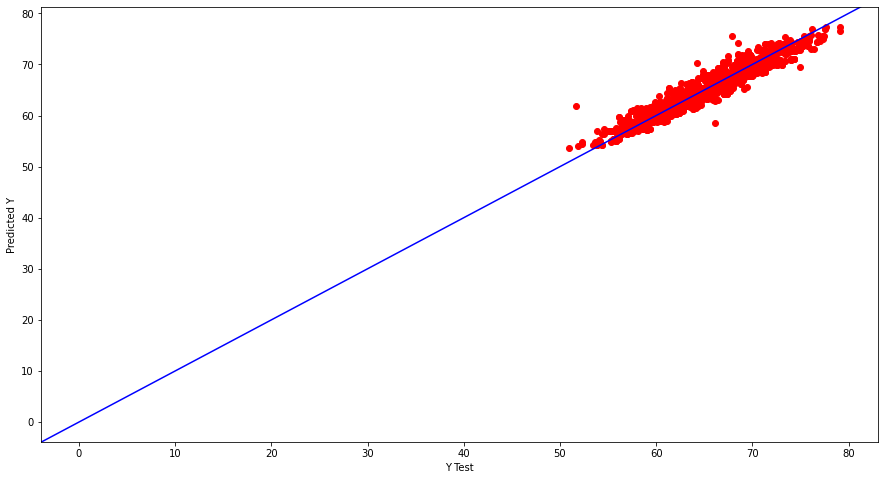

In [104]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_rfr, c='red')
plt.axline([0, 0], [1, 1],c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

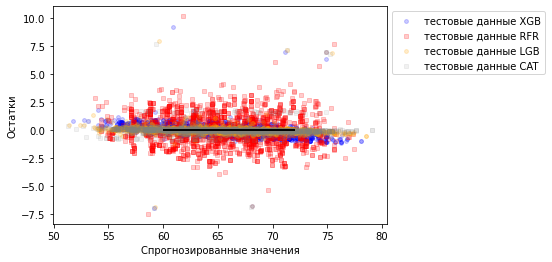

In [105]:
#plt.scatter(y_train_xgb, y_train_xgb-y_train, marker = 'o',c = 'steelblue', s = 45, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_xgb, y_test_xgb-y_test, marker = 'o', s = 15, c = 'blue', alpha = .2, label='тестовые данные XGB')

#plt.scatter(y_train_rfr, y_train_rfr-y_train, marker = 'o',c = 'steelblue', s = 35, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_rfr, y_test_rfr-y_test, marker = 's', s = 15, c = 'red', alpha = .2, label='тестовые данные RFR')

#plt.scatter(y_train_lgb, y_train_lgb-y_train, marker = 'o',c = 'steelblue', s = 45, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_lgb, y_test_lgb-y_test, marker = 'o', s = 15, c = 'orange', alpha = .2, label='тестовые данные LGB')

#plt.scatter(y_train_cat, y_train_cat-y_train, marker = 'o',c = 'steelblue', s = 45, alpha = .5, label='обучающие данные',edgecolor='black',)
plt.scatter(y_test_cat, y_test_cat-y_test, marker = 's', s = 15, c = 'gray', alpha = .1, label='тестовые данные CAT')

plt.xlabel ( 'Спрогнозированные значения' )
plt.ylabel ('Остатки')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.hlines(y=0, xmin=60, xmax=72, lw=2, color='black')

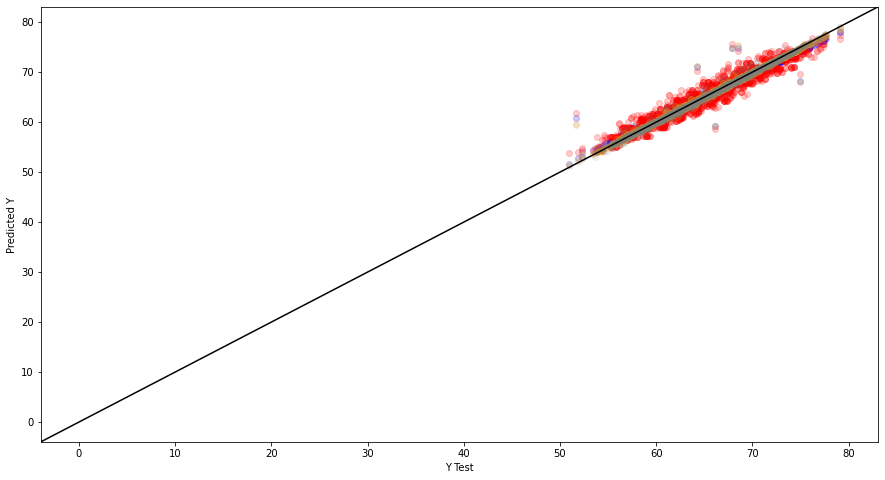

In [106]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_xgb, c='blue',alpha = .2)

plt.scatter(y_test,y_test_rfr, c='red',alpha = .2)

plt.scatter(y_test,y_test_lgb, c='orange',alpha = .2)

plt.scatter(y_test,y_test_cat, c='gray',alpha = .1)

plt.axline([0, 0], [1, 1],c='black')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()